In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns


dataset=pd.read_csv('car data.csv')
# dataset.head()
# print(dataset)
# dataset.describe()
# dataset.isnull().sum()

dataset=dataset.drop(['Car_Name'],axis=1)
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB
None


In [11]:
dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
dataset.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


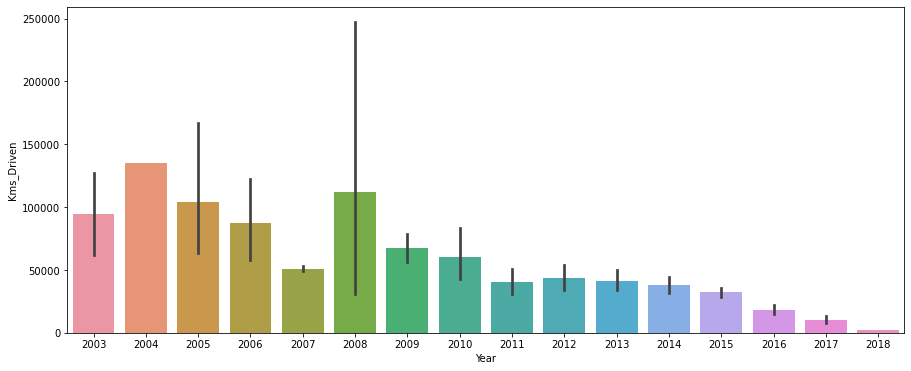

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Year', y = 'Kms_Driven', data = dataset)
plt.xticks(rotation = 0)
plt.show()

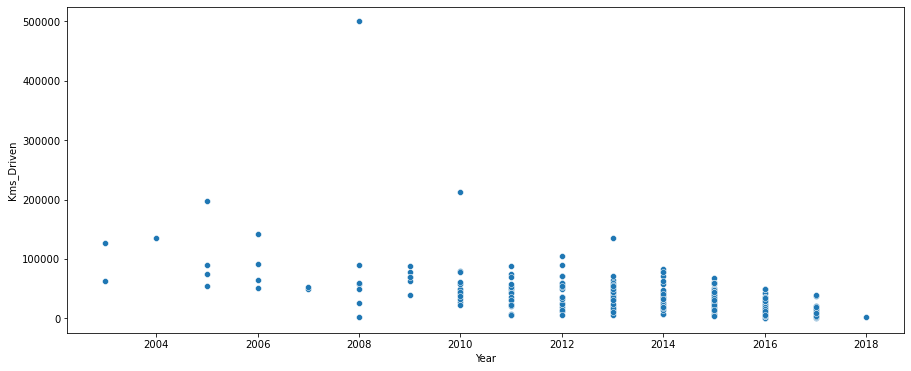

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'Year', y = 'Kms_Driven', data = dataset)
plt.xticks(rotation = 0)
plt.show()

In [2]:
#for checking the categoricaal districbution 
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
print(dataset.info())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB
None


In [3]:
# feature Scaling  
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()   
# print(dataset.iloc[:,3:4])
# dataset.iloc[:,3:4]=st_x.fit_transform(dataset.iloc[:,3:4])
# even after doing feature scaling there is no chaane in the score 
print(dataset) 

     Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    2014           3.35           5.59       27000          0            0   
1    2013           4.75           9.54       43000          1            0   
2    2017           7.25           9.85        6900          0            0   
3    2011           2.85           4.15        5200          0            0   
4    2014           4.60           6.87       42450          1            0   
..    ...            ...            ...         ...        ...          ...   
296  2016           9.50          11.60       33988          1            0   
297  2015           4.00           5.90       60000          0            0   
298  2009           3.35          11.00       87934          0            0   
299  2017          11.50          12.50        9000          1            0   
300  2016           5.30           5.90        5464          0            0   

     Transmission  Owner  
0               0      0

In [4]:
x=dataset.drop(['Selling_Price'],axis=1)
print(x)
y=dataset.iloc[:,1:2]
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [5]:
# creating train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(x_train,y_train)
y_pred=Regressor.predict(x_train)

#here we can do accuracy score and confusion matrix as it is continuous values and we can use accuracy_score for classification only 

# cm=confusion_matrix(y_train,y_pred)
# print(cm)
# praccuracy_score(y_train,y_pred)

from sklearn import metrics
# R squared Error

# this we have checked the training data 

error_score = metrics.r2_score(y_train, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8684260777667914


In [7]:
#  now check the test data 
y_test_pred=Regressor.predict(x_test)
error_score1=metrics.r2_score(y_test,y_test_pred)
print("R squared error for test data ", error_score1)

R squared error for test data  0.9134181721224167


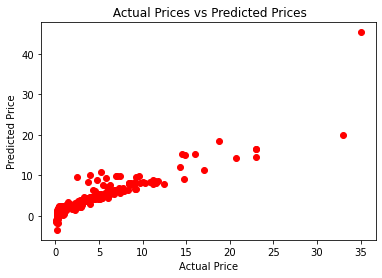

R squared error for test data  0.8679568094168661


In [24]:
# plt.scatter(x_train,y_train)
from sklearn.linear_model import Ridge, RidgeCV, Lasso
lass_reg_model=Lasso()
lass_reg_model.fit(x_train,y_train)
plt.scatter(y_train,lass_reg_model.predict(x_train),color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
y_test_pred=lass_reg_model.predict(x_test)
error_score1=metrics.r2_score(y_test,y_test_pred)
print("R squared error for test data ", error_score1)

<ipython-input-30-a0413871bafe>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


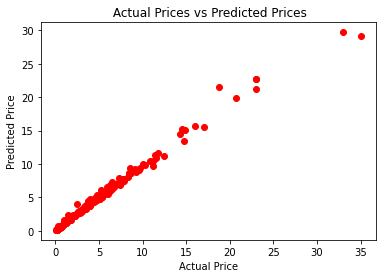

R squared error for test data  0.9571428177592206


In [30]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train,y_train)
plt.scatter(y_train,regressor.predict(x_train),color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
y_test_pred=regressor.predict(x_test)
error_score1=metrics.r2_score(y_test,y_test_pred)
print("R squared error for test data ", error_score1)

In [ ]:
pickle.dump(Regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
# Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, 
# it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state 
# across sessions, or transport data over the network
# the bytes type is a sequence of bytes that have been encoded and are ready to be stored in memory/disk.

In [ ]:
# BY COMPARING LINEAR AND LASSOR MODEL. LINEAR MODEL GIVES THE HIGHEST ACCURACY SCORE OF 91.34% SO . FOR CAR PRICE
# PREDICTION LINEAR MODEL WILL BE USED. 